## Referencias
Apóyate en las bitácoras, los notebooks trabajados y las presentaciones vistas en clase para resolver tu proyecto. También será de mucha utilidad la documentación de las librerías de Python. No dudes en consultar comunidades online como Stack Overflow y, por supuesto, buscar en la web (googlear).

## Consigna
Te presentamos los pasos a seguir para realizar el proyecto 04.

    * 1 Elige tu punto de partida entre dos opciones:
     Tus Proyectos 01 y 02
     Tu Proyecto 03
     Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

    * 2 Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

    * 3 Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.
    * 4 Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.
    * 5 Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.
    * 6 Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

## Checklist de evaluación
    * Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.
    * Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.
    * Las preguntas que se respondan deben estar correctamente explicitadas.
    * Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.
    * Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.
    * Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

## Cosas a desarrollar durante el análisis exploratorio de datos:
   * Se extrajeron datos de twitter a través de la librería 'Tweepy' [Enlace a repositorio de Github en donde está explicada la extracción de tweets](https://github.com/panasabena/Tweepy), se buscaron palabras clave tales como: 'muy malo', 'malo', 'bueno', 'muy bueno', 'excelente' y 'perfecto'. Con el fin de alimentar la base de datos de Amazon que ya tenemos. Y para poder alimentar a los modelos de predicción con formas de expresarse diferentes. 
   * Preguntas a contestar durante el desarrollo del análisis:
   * ¿Cómo se distribuyen los datos?, ¿Cuál va a ser la técnica a utilizar para poder hacer una análisis exploratorio? ¿Cómo influyen los tweets repetidos (ReTweets)? ¿Influyen las etiquetas a otros usuarios en el puntaje asignado a cada tweet?
   * Para poder darle un puntaje a los tweets se utiliza la librería 'Sentiment_analyisis_spanish'. Con el fin de realizar un análisis exploratorio de datos más intuitivo. Es decir que con estos puntajes, se van a poder hacer gráficos de dispersión, de distribución, de cajas, entre otros.
   

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from nltk.corpus import gutenberg
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import re
from pylab import *

### Expandimos la base de datos con comentarios de Twitter
    Se extrajeron tweets que contienen las palabras 'muy malo', 'malo', 'buenos', 'muy bueno' y 'Excelente'. Con el fin de ampliar la cantidad de críticas y comparar unas con otras.
    * Como punto de partida suponemos que los tweets extraídos, cada palabra hace referencia a un puntaje.
    * Para la palabra 'muy malo', suponemos una estrella como puntaje
    * Para la palabra 'malo', suponemos dos estrellas como puntaje
    * Para la palabra 'bueno', suponemos tres estrellas como puntaje
    * Para la palabra 'muy bueno', suponemos cuatro estrellas como puntaje
    * Para la palabra 'Excelente', suponemos cinco estrellas como puntaje
    * Más adelante veremos si esta hipótesis se cumple. Para no dañar nuestro dataset inicial.

In [2]:
tweets_muymalos=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\muymalo.xlsx')
tweets_malos=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\malo.xlsx')
tweets_buenos=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\bueno.xlsx')
tweets_muybuenos=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\muybueno.xlsx')
tweets_Excelente=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\Excelente.xlsx')

In [3]:
print('Cantidad de filas y columnas de los tweets_muymalos: ',tweets_muymalos.shape)
print('Cantidad de filas y columnas de los tweets_malos: ',tweets_malos.shape)
print('Cantidad de filas y columnas de los tweets_buenos: ',tweets_buenos.shape)
print('Cantidad de filas y columnas de los tweets_muybuenos: ',tweets_muybuenos.shape)
print('Cantidad de filas y columnas de los tweets_Excelente: ',tweets_Excelente.shape)
print("\n##--->  Datos faltantes de tweets_muymalos: <---##\n",tweets_muymalos.isna().sum())
print("\n##--->  Datos faltantes de tweets_malos: <---##\n",tweets_malos.isna().sum())
print("\n##--->  Datos faltantes de tweets_buenos: <---##\n",tweets_buenos.isna().sum())
print("\n##--->  Datos faltantes de tweets_muybuenos: <---##\n",tweets_muybuenos.isna().sum())
print("\n##--->  Datos faltantes de tweets_Excelente: <---##\n",tweets_Excelente.isna().sum())

Cantidad de filas y columnas de los tweets_muymalos:  (5612, 13)
Cantidad de filas y columnas de los tweets_malos:  (7783, 13)
Cantidad de filas y columnas de los tweets_buenos:  (5073, 13)
Cantidad de filas y columnas de los tweets_muybuenos:  (5709, 13)
Cantidad de filas y columnas de los tweets_Excelente:  (5347, 13)

##--->  Datos faltantes de tweets_muymalos: <---##
 Id                                0
Texto                             0
Fuente                            0
Truncado                          0
Respuesta_al_tweet             3312
Respuesta_al_usuario_id        3253
Respuesta_al_usuario_nombre    3253
Localización                   5612
Coordenadas                    5612
Ciudad                         5552
Contribuciones                 5612
Idioma                            0
Retweeted                         0
dtype: int64

##--->  Datos faltantes de tweets_malos: <---##
 Id                                0
Texto                             0
Fuente                

## Procesado de comentarios de Twitter
### Se dejan en el mismo tamaño todos las categorías de tweets:
`5000 tweets por cada categoría`
### Se les asignan estrellas a cada categoría:
    * 1 estrella a los tweets que contienen las palabras  "muy malo"
    * 2 estrellas a los tweets que contienen la palabra "malo".
    * 3 estrellas a los tweets que contienen la palabra "bueno".
    * 4 estrellas a los tweets que contienen la palabra "muy bueno".
    * 5 estrellas a los tweets que contienen la palabra "excelente".

In [4]:
## En este código dejamos a todas las categorías de tweets con el mismo tamaño
tweetsmuymalos=tweets_muymalos[0:5000].copy()
tweetsmalos=tweets_malos[0:5000].copy()
tweetsbuenos=tweets_buenos[0:5000].copy()
tweetsmuybuenos=tweets_muybuenos[0:5000].copy()
tweetsExcelente=tweets_Excelente[0:5000].copy()

In [5]:
## Chequeamos:
print('Cantidad de filas y columnas de los tweetsmuymalos: ',tweetsmuymalos.shape)
print('Cantidad de filas y columnas de los tweetsmalos: ',tweetsmalos.shape)
print('Cantidad de filas y columnas de los tweetsbuenos: ',tweetsbuenos.shape)
print('Cantidad de filas y columnas de los tweetsmuybuenos: ',tweetsmuybuenos.shape)
print('Cantidad de filas y columnas de los tweetsExcelente: ',tweetsExcelente.shape)

Cantidad de filas y columnas de los tweetsmuymalos:  (5000, 13)
Cantidad de filas y columnas de los tweetsmalos:  (5000, 13)
Cantidad de filas y columnas de los tweetsbuenos:  (5000, 13)
Cantidad de filas y columnas de los tweetsmuybuenos:  (5000, 13)
Cantidad de filas y columnas de los tweetsExcelente:  (5000, 13)


In [6]:
tweetsmuymalos["Estrella"] = 1
tweetsmalos["Estrella"] = 2
tweetsbuenos["Estrella"] = 3
tweetsmuybuenos["Estrella"] = 4
tweetsExcelente["Estrella"] = 5

### Cargamos la librería "prometida" en el trabajo anterior:

In [7]:
from sentiment_analysis_spanish import sentiment_analysis

In [8]:
sentimientos=sentiment_analysis.SentimentAnalysisSpanish()

C:\Users\Alfredo\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Alfredo\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Probamos la libreria para ver como funciona
    Lo que hace es puntuar del "0 al 1" a una frase. "0" (cero) como lo más negativo y "1"(uno) como lo más positivo.

In [9]:
print(sentimientos.sentiment("Malisimo todo mal"))
print(sentimientos.sentiment("Buenisimo todo"))

0.05939652084083374
0.5957399490333923


In [10]:
tweetsmuymalos.head(3)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1


In [11]:
tweetsmuymalos["sentimiento"] = tweetsmuymalos["Texto"].apply(lambda x:sentimientos.sentiment(x))
tweetsmalos["sentimiento"] = tweetsmalos["Texto"].apply(lambda x:sentimientos.sentiment(x))
tweetsbuenos["sentimiento"] = tweetsbuenos["Texto"].apply(lambda x:sentimientos.sentiment(x))
tweetsmuybuenos["sentimiento"] = tweetsmuybuenos["Texto"].apply(lambda x:sentimientos.sentiment(x))
tweetsExcelente["sentimiento"] = tweetsExcelente["Texto"].apply(lambda x:sentimientos.sentiment(x))
todos_los_tweets=[tweetsmuymalos,tweetsmalos,tweetsbuenos,tweetsmuybuenos,tweetsExcelente]

In [12]:
#Unimos todos los tweets
todos_los_tweets=[tweetsmuymalos,tweetsmalos,tweetsbuenos,tweetsmuybuenos,tweetsExcelente]
tweets = pd.concat(todos_los_tweets)

### En los siguientes gráficos podemos interpretas la distribución de los sentimientos de acuerdo a las palabras que contienen.
    * Se puede observar que en las estrellas 4 y 5 tiene un marcado indice de normalidad, es decir que la distribución entre los tweets es bastante parecida`.
    * En la estrella 3 se puede observar que la puntuación decrece de manera abrupta en comparación con los tweets "muy buenos" y "excelentes"`.
    * En la estrella 1 y 2 el sentimiento es bastante más cercano a cero, pero de todas maneras se ve que hay una gran cantidad de outliers.
#### Una vez aclarado lo anterior, vamos a seguir con el planteamiento del problema que es poder crear un modelo matemático de predicción cuyo objetivo principal sea mejorar el rendimiento.

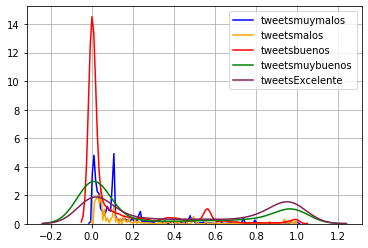

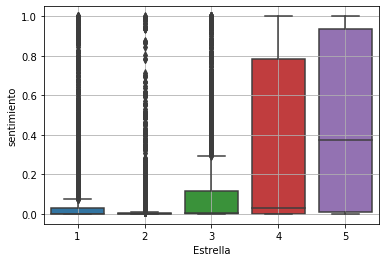

In [13]:
todos_los_tweets=[tweetsmuymalos,tweetsmalos,tweetsbuenos,tweetsmuybuenos,tweetsExcelente]
sns.distplot(tweetsmuymalos[['sentimiento']], hist=False,color='blue', label = 'tweetsmuymalos')
sns.distplot(tweetsmalos[['sentimiento']], hist=False,color='orange', label = 'tweetsmalos')
sns.distplot(tweetsbuenos[['sentimiento']], hist=False,color='red', label = 'tweetsbuenos')
sns.distplot(tweetsmuybuenos[['sentimiento']], hist=False,color='green', label = 'tweetsmuybuenos')
sns.distplot(tweetsExcelente[['sentimiento']], hist=False,color='#7F2353', label = 'tweetsExcelente')

plt.grid()
plt.show()

sns.boxplot(data = tweets, x = 'Estrella', y = "sentimiento")
plt.grid()
plt.show()

Cantidad de estrellas: 5
[1 2 3 4 5]


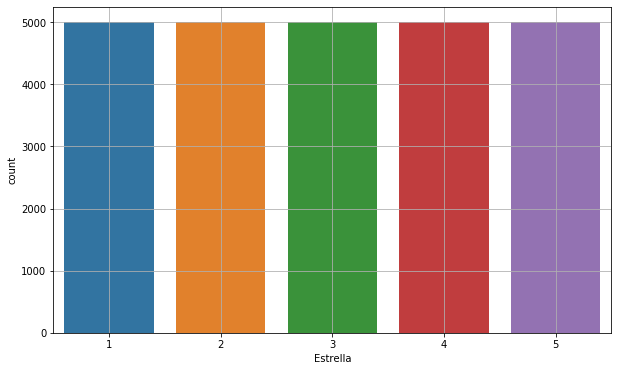

In [14]:
# Cuento la distribución de estrellas en el dataset nuevo de twitter
stars=tweets['Estrella']

print("Cantidad de estrellas:", len(tweets['Estrella'].unique()))
print(tweets['Estrella'].unique())
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=tweets['Estrella'].value_counts()
cuento_estrellas
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Estrella', data=tweets)
plt.grid()

### Investigamos un poco más a cerca de la distribución de los puntajes de los Tweets de acuerdo a la categoría previamente asignada:
`Queremos ver si la categoría asignada es correcta, para eso suponemos lo siguiente:`
   * Si la estrella coincide con su puntaje es correcto. ¿Pero, como determinamos esto?
   
   
   
   * Suponemos que para la estrella 1, sus sentimientos correctos serían del 0 al 0.2
   * Suponemos que para la estrella 2, sus sentimientos correctos serían del 0.2 al 0.4
   * Suponemos que para la estrella 3, sus sentimientos correctos serían del 0.4 al 0.6
   * Suponemos que para la estrella 4, sus sentimientos correctos serían del 0.6 al 0.8
   * Suponemos que para la estrella 5, sus sentimientos correctos serían del 0.8 al 1

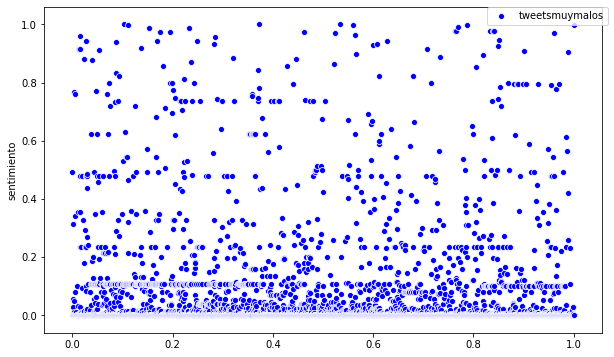

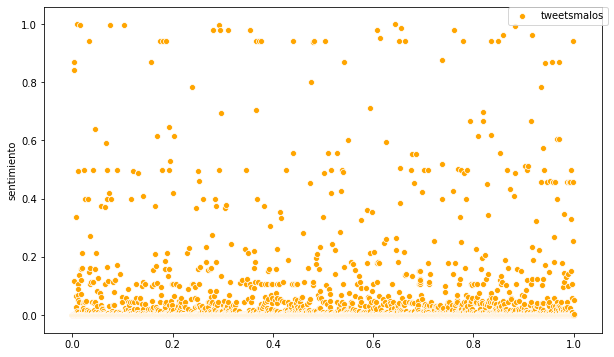

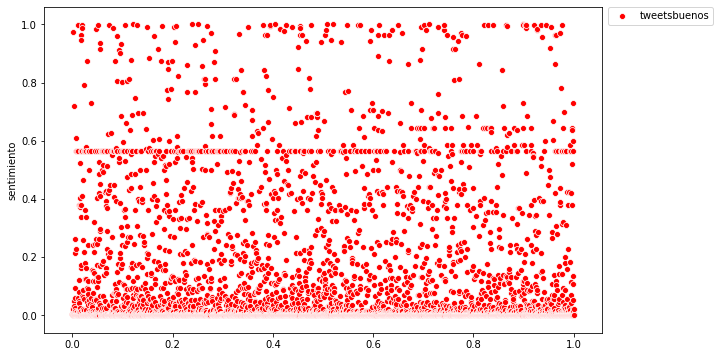

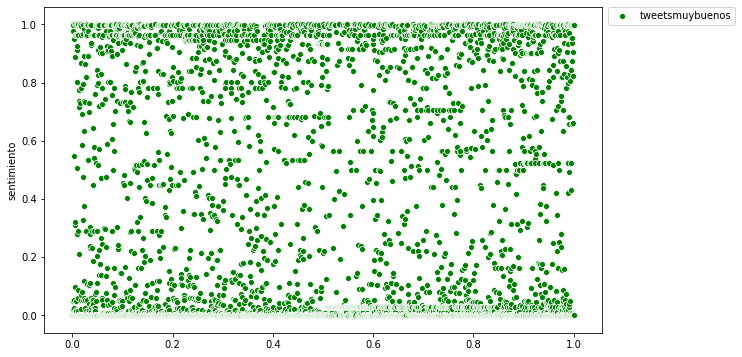

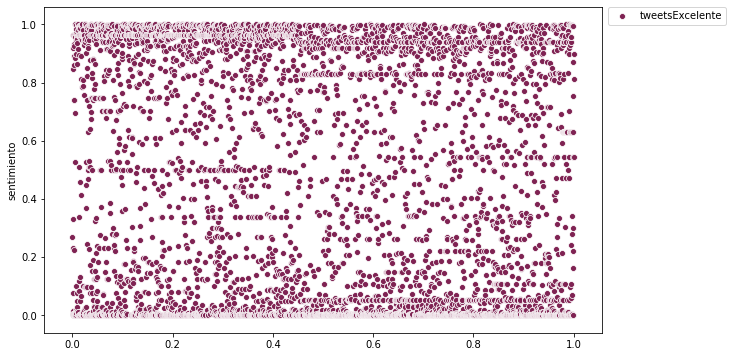

In [15]:
# La variable N indica la cantidad de tweets
N = 5000
# Se normaliza la variable N con el fin de visualizar mejor los datos
valores = np.linspace(0,1,N)
## Gráfico de la estrella 1:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmuymalos, x=valores , y="sentimiento", color='blue',label = 'tweetsmuymalos') 
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 2:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmalos, x=valores , y="sentimiento", color='orange',label = 'tweetsmalos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 3:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsbuenos, x=valores , y="sentimiento", color='red',label = 'tweetsbuenos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 4:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmuybuenos, x=valores , y="sentimiento", color='green', label = 'tweetsmuybuenos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 5:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsExcelente, x=valores , y="sentimiento", color='#7F2353', label = 'tweetsExcelente')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

### De acuerdo a los gráficos anteriores, concluimos:
* `[Para los tweets catalogados como "Muy malos":]` Hay una clara acumulación en sentimientos negativos. Y algunos "Outliers que indican lo contrario".
* `[Observando el gráfico de los tweets "Malos":]`  podemos notar que la concentración de críticas malas es aún mayor. ¿Pero porqué sucede este fenómeno? Puede deberse a que la palabra malo haga una mayor referencia a algo negativo a diferencia de los tweets que contienen la frase "muy malo". 
Los tweets que contienen al "muy malo", no necesariamente estas palabras tienen que estar una seguida de la otra, por lo que el comentarista puede hacer referencia a algo que es "malo" y luego objetar eso con algo que es "muy bueno".
* `[En el gráfico de tweets con la palabra "bueno":]` Suceden varias cosas. Aumenta la variación de de los sentimientos, con una marcada línea en los sentimientos neutros, es decir, de valores iguales a 0.5. Y por otro lado, sucede algo contradictorio, que se acumula gran porcentaje de los tweets entre 0 y  0.2. 
* `[Luego, en el gráfico de los comentarios que contienen la frase "muy bueno y "Excelente":"]` hay un marcado ascenso en el puntaje de las críticas. Manteniendo al mismo tiempo una gran polaridad entre sus valores. Esto se puede observar, con el gran espaciado en blanco entre 0.3 y 0.7.

## Para detallar con datos lo previamente explicado, se muestra la sumatoria total de cada categoría de sentimientos, la media y la desviación estándar.
#### Luego de calcular estas métricas se realiza un gráfico comparativo de las mismas.

La suma de tweetsmuymalos es:  305.3463370957383
La media de tweetsmuymalos es:  0.06106926741914763
La desviación estandar de tweetsmuymalos es:  0.15904790455464143

La suma de tweetsmalos es:  149.2587635460191
La media de tweetsmalos es:  0.02985175270920372
La desviación estandar de tweetsmalos es:  0.11680952739230943

La suma de tweetsbuenos es:  618.1625305268766
La media de tweetsbuenos es:  0.12363250610537468
La desviación de tweetsbuenos es:  0.22941954493836933

La suma de tweetsmuybuenos es:  1550.6378856912293
La media de tweetsmuybuenos es:  0.3101275771382483
La desviación de tweetsmuybuenos es:  0.40710030505576

La suma de tweetsExcelente es:  2289.175710253494
La media de tweetsExcelente es:  0.4578351420507006
La desviación de tweetsExcelente es:  0.41615445801975326


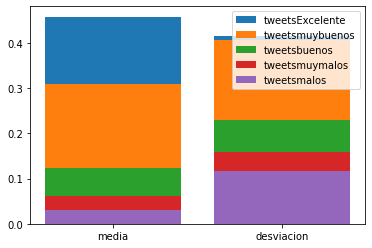

In [16]:
print("La suma de tweetsmuymalos es: ",tweetsmuymalos['sentimiento'].sum())
print("La media de tweetsmuymalos es: ",tweetsmuymalos['sentimiento'].mean())
print("La desviación estandar de tweetsmuymalos es: ",tweetsmuymalos['sentimiento'].std(ddof=0))
estadistica=['media','desviacion']
v1=[tweetsmuymalos['sentimiento'].mean(),tweetsmuymalos['sentimiento'].std(ddof=0)]
print("\nLa suma de tweetsmalos es: ",tweetsmalos['sentimiento'].sum())
print("La media de tweetsmalos es: ",tweetsmalos['sentimiento'].mean())
print("La desviación estandar de tweetsmalos es: ",tweetsmalos['sentimiento'].std(ddof=0))
v2=[tweetsmalos['sentimiento'].mean(),tweetsmalos['sentimiento'].std(ddof=0)]
print("\nLa suma de tweetsbuenos es: ",tweetsbuenos['sentimiento'].sum())
print("La media de tweetsbuenos es: ",tweetsbuenos['sentimiento'].mean())
print("La desviación de tweetsbuenos es: ",tweetsbuenos['sentimiento'].std(ddof=0))
v3=[tweetsbuenos['sentimiento'].mean(),tweetsbuenos['sentimiento'].std(ddof=0)]
print("\nLa suma de tweetsmuybuenos es: ",tweetsmuybuenos['sentimiento'].sum())
print("La media de tweetsmuybuenos es: ",tweetsmuybuenos['sentimiento'].mean())
print("La desviación de tweetsmuybuenos es: ",tweetsmuybuenos['sentimiento'].std(ddof=0))
v4=[tweetsmuybuenos['sentimiento'].mean(),tweetsmuybuenos['sentimiento'].std(ddof=0)]
print("\nLa suma de tweetsExcelente es: ",tweetsExcelente['sentimiento'].sum())
print("La media de tweetsExcelente es: ",tweetsExcelente['sentimiento'].mean())
print("La desviación de tweetsExcelente es: ",tweetsExcelente['sentimiento'].std(ddof=0))
v5=[tweetsExcelente['sentimiento'].mean(),tweetsExcelente['sentimiento'].std(ddof=0)]
plt.bar(estadistica,v5, label="tweetsExcelente")
plt.bar(estadistica,v4, label="tweetsmuybuenos")
plt.bar(estadistica,v3, label="tweetsbuenos")
plt.bar(estadistica,v1, label="tweetsmuymalos")
plt.bar(estadistica,v2, label="tweetsmalos")
plt.legend()

### Si bien, en el Scatter plot se ve una gran dispersión de todas las categorías, se cumple una cierta jerarquía en el puntaje. Es decir, los tweets que contienen la palabra "Excelente" se mantienen primeros en la positividad y así sucesivamente hasta los "muy malos".
    1°- "Excelente"
    2°- "Muy bueno"
    3°- "Bueno"
    4°- "Muy malos"
    5°- "Malo"

In [17]:
enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
tweets.head(3)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.907869e-01
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,3.146642e-01
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07


#### La columna Retweet no funciona y la de RetweetBinario, como hace referencia al true o False del Retweet, tampoco funciona. Por lo que son elimiinadas dek dataset

In [19]:
tweets.drop(['Retweeted'], axis=1)
tweets.head(2)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,0.490787
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,0.314664


In [20]:
%%time
listaTweets=[]
for i in tweets["Texto"]:
    listaTweets.append(i)

Wall time: 22 ms


In [21]:
print (listaTweets[0:10])

['Te ves muy buena y yo soy muy malo, paso', '@renbabaee @CosmicArepas estás tardando eh? muy bueno en la línea de los memes pero malo en la línea del amor', '@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa de Mbappe fue muy decepcionante, y no he dicho que Griezmann sea malo o no sea para tanto, Es un jugadorazo y un crack mundial, con Francia es una locura, Simplemente dije que en el mundial fue mas determinante Mbappe, No ignorando el gran trabajo de Griezmann.', 'RT @noemimarcela15: Morenita le pido con todo mi corazón\xa0 que le brinde un muy bellisimo día a mi abue bella y que su valiosa bendicion la\x85', 'Pero ese olor es muy rico!!!\nLo malo es q vas a querer comprarte todo jajajaj', '@diegomunoz75 Todo muy lindo con tus estadisticas pero me vas a negar que no jugo BIEN todos estos partidos? No seas malo', '@LisQue2 @Alvisepf @LeticiaDolera Me hace gracia lo de los derechos de la infancia, eso es muy bonito pero lo malo es que de donde no hay no se puede sacar...llévatelo a a t

### Identificamos a los retweets con 1(uno) y con 0(cero) a los que no son retweets.
    Con el fin de analizar nuevamente los sesgos y puntajes de cada categoria. 
    Vamos a eliminar a los retweets, ya que son tweets repetidos.

In [22]:
%%time
retweet=[]
contador=0
for i in listaTweets[0:25000]:
    if "RT" in i:
        contador+=1
        retweet.append(1)
    else:
        contador+=0
        retweet.append(0)
#print("Hay: ",contador," retweets")
#print(retweet)

Wall time: 28 ms


### Pasamos a formato Dataframe esa lista creada y la unimos al dataframe general

In [23]:
retweetdf = pd.DataFrame(retweet, columns = ['Es_Retweet'])
type(retweetdf)

pandas.core.frame.DataFrame

In [24]:
tweets["Es_Retweet"]=retweetdf
tweets.head(5)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Es_Retweet
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.907869e-01,0
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,3.146642e-01,0
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07,0
3,1409903584024666112,RT @noemimarcela15: Morenita le pido con todo ...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,2.708075e-02,1
4,1409904001605307904,Pero ese olor es muy rico!!!\nLo malo es q vas...,Twitter for iPhone,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,5.666328e-02,0


### Contamos la cantidad de Retweets, con el fin de saber cuantos tweets nos estarían sesgando la base de datos
    Vemos que hay que borrar 8100 tweets, porque están repetidos. Obviamente depende de lo que deseemos hacer con dichos datos, en este caso los vamos a borrar porque lo que buscamos hacer es alimentar otra base de datos.
    Si buscaramos encontrar algún patrón de sentimiento, deberíamos tomar otra medida.

In [25]:
tweets["Es_Retweet"].value_counts()

0    16900
1     8100
Name: Es_Retweet, dtype: int64

### Ahora: buscamos eliminar del tweet palabras que nos muestren una página web o alguna url. Y también eliminar del tweet a las personas que están arrobadas.
### ¿Para qué? bueno, esto lo hacemos porque puede que un perfil tenga algún nombre ofensivo y esto nos sesga el puntaje del tweet.
### En la siguiente linea de código probamos el funcionamiento de dicho "experimento"

In [26]:
text = '@username1: some tweet here, http://www.url.com, aaaaa @username2'
processed_text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
processed_text = " ".join(processed_text.split())
print(processed_text)

some tweet here, aaaaa


In [27]:
tweets_regex=[]
for i in tweets['Texto']:
    x= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", i)
    tweets_regex.append(x)
#print(tweets_regex)

In [28]:
tweets_regexdf = pd.DataFrame(tweets_regex, columns = ['Tweets_sin_extras'])
tweets["Tweets_sin_extras"]=tweets_regexdf
tweets.head(5)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Es_Retweet,Tweets_sin_extras
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.907869e-01,0,"Te ves muy buena y yo soy muy malo, paso"
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,3.146642e-01,0,estás tardando eh? muy bueno en la línea de ...
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07,0,La eurocopa de Mbappe fue muy decepcionante...
3,1409903584024666112,RT @noemimarcela15: Morenita le pido con todo ...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,2.708075e-02,1,RT Morenita le pido con todo mi corazón que ...
4,1409904001605307904,Pero ese olor es muy rico!!!\nLo malo es q vas...,Twitter for iPhone,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,5.666328e-02,0,Pero ese olor es muy rico!!!\nLo malo es q vas...


### Borramos los retweets

In [29]:
dfxx = tweets.drop(tweets[(tweets.Es_Retweet == 1)].index)

In [30]:
dfxx["sentimiento_nuevo"] = dfxx["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
dfxx.head(3)

C:\Users\Alfredo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Es_Retweet,Tweets_sin_extras,sentimiento_nuevo
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.907869e-01,0,"Te ves muy buena y yo soy muy malo, paso",4.907869e-01
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,3.146642e-01,0,estás tardando eh? muy bueno en la línea de ...,3.146642e-01
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07,0,La eurocopa de Mbappe fue muy decepcionante...,1.004252e-07


Cantidad de estrellas: 5
[1 2 3 4 5]


5    3380
4    3380
3    3380
2    3380
1    3380
Name: Estrella, dtype: int64

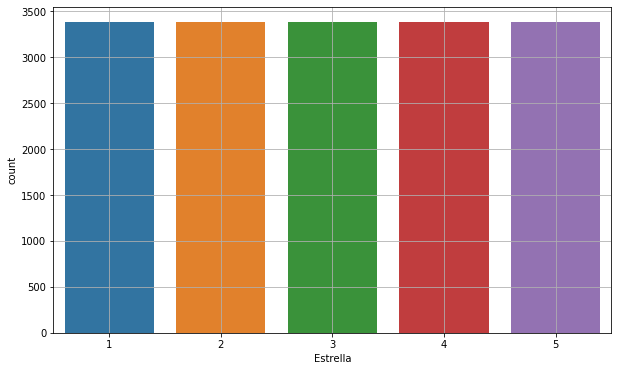

In [31]:
# Cuento la distribución de estrellas en el dataset nuevo de twitter
stars=dfxx['Estrella']

print("Cantidad de estrellas:", len(dfxx['Estrella'].unique()))
print(dfxx['Estrella'].unique())
plt.figure(figsize=(10,6))
#tipologia.hist()
plt.xticks(rotation=0)
cuento_estrellas=dfxx['Estrella'].value_counts()
cuento_estrellas
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Estrella', data=dfxx)
plt.grid()
dfxx["Estrella"].value_counts()

In [32]:
muymalotweets=dfxx[0:3380].copy()
malotweets=dfxx[3380:6760].copy()
buenotweets=dfxx[6760:10140].copy()
muybuenotweets=dfxx[10140:13520].copy()
excelentetweets=dfxx[13520:16900].copy()
muymalotweets["sentimiento_nuevo"] = muymalotweets["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
malotweets["sentimiento_nuevo"] = malotweets["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
buenotweets["sentimiento_nuevo"] = buenotweets["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
muybuenotweets["sentimiento_nuevo"] = muybuenotweets["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
excelentetweets["sentimiento_nuevo"] = excelentetweets["Tweets_sin_extras"].apply(lambda x:sentimientos.sentiment(x))
#todos_los_tweets=[tweetsmuymalos,tweetsmalos,tweetsbuenos,tweetsmuybuenos,tweetsExcelente]

La suma de muymalotweets es:  200.59097713335052
La media de muymalotweets es:  0.05934644293886098
La desviación estandar de muymalotweets es:  0.160095875680181

La suma de malotweets es:  200.59097713335052
La media de malotweets es:  0.05934644293886098
La desviación estandar de malotweets es:  0.160095875680181

La suma de buenotweets es:  200.59097713335052
La media de buenotweets es:  0.05934644293886098
La desviación de buenotweets es:  0.160095875680181

La suma de muybuenotweets es:  200.59097713335052
La media de muybuenotweets es:  0.05934644293886098
La desviación de muybuenotweets es:  0.160095875680181

La suma de excelentetweets es:  200.59097713335052
La media de excelentetweets es:  0.05934644293886098
La desviación de excelentetweets es:  0.160095875680181


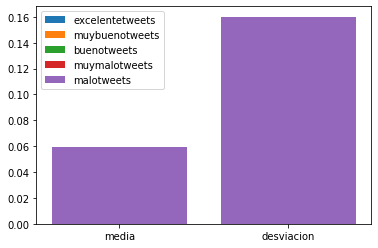

In [33]:
print("La suma de muymalotweets es: ",muymalotweets['sentimiento_nuevo'].sum())
print("La media de muymalotweets es: ",muymalotweets['sentimiento_nuevo'].mean())
print("La desviación estandar de muymalotweets es: ",muymalotweets['sentimiento_nuevo'].std(ddof=0))
estadistica=['media','desviacion']
v1=[muymalotweets['sentimiento_nuevo'].mean(),muymalotweets['sentimiento_nuevo'].std(ddof=0)]
print("\nLa suma de malotweets es: ",malotweets['sentimiento_nuevo'].sum())
print("La media de malotweets es: ",malotweets['sentimiento_nuevo'].mean())
print("La desviación estandar de malotweets es: ",malotweets['sentimiento_nuevo'].std(ddof=0))
v2=[malotweets['sentimiento_nuevo'].mean(),malotweets['sentimiento_nuevo'].std(ddof=0)]
print("\nLa suma de buenotweets es: ",buenotweets['sentimiento_nuevo'].sum())
print("La media de buenotweets es: ",buenotweets['sentimiento_nuevo'].mean())
print("La desviación de buenotweets es: ",buenotweets['sentimiento_nuevo'].std(ddof=0))
v3=[buenotweets['sentimiento_nuevo'].mean(),buenotweets['sentimiento_nuevo'].std(ddof=0)]
print("\nLa suma de muybuenotweets es: ",muybuenotweets['sentimiento_nuevo'].sum())
print("La media de muybuenotweets es: ",muybuenotweets['sentimiento_nuevo'].mean())
print("La desviación de muybuenotweets es: ",muybuenotweets['sentimiento_nuevo'].std(ddof=0))
v4=[muybuenotweets['sentimiento_nuevo'].mean(),muybuenotweets['sentimiento_nuevo'].std(ddof=0)]
print("\nLa suma de excelentetweets es: ",excelentetweets['sentimiento_nuevo'].sum())
print("La media de excelentetweets es: ",excelentetweets['sentimiento_nuevo'].mean())
print("La desviación de excelentetweets es: ",excelentetweets['sentimiento_nuevo'].std(ddof=0))
v5=[excelentetweets['sentimiento_nuevo'].mean(),excelentetweets['sentimiento_nuevo'].std(ddof=0)]
plt.bar(estadistica,v5, label="excelentetweets")
plt.bar(estadistica,v4, label="muybuenotweets")
plt.bar(estadistica,v3, label="buenotweets")
plt.bar(estadistica,v1, label="muymalotweets")
plt.bar(estadistica,v2, label="malotweets")
plt.legend()

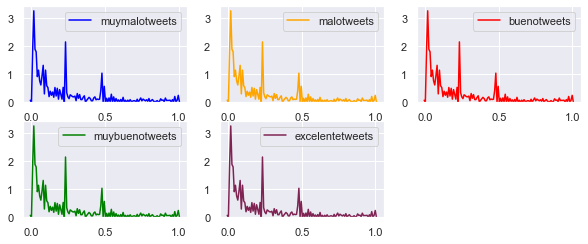

In [34]:
sns.set(rc={"figure.figsize": (10, 6)})
subplot(3,3,1)
ax = sns.distplot(muymalotweets[['sentimiento_nuevo']], hist=False,color='blue', label = 'muymalotweets')
subplot(3,3,2)
ax = sns.distplot(malotweets[['sentimiento_nuevo']], hist=False,color='orange', label = 'malotweets')
subplot(3,3,3)
ax = sns.distplot(buenotweets[['sentimiento_nuevo']], hist=False,color='red', label = 'buenotweets')
subplot(3,3,4)
ax = sns.distplot(muybuenotweets[['sentimiento_nuevo']], hist=False,color='green', label = 'muybuenotweets')
subplot (3,3,5)
ax = sns.distplot(excelentetweets[['sentimiento_nuevo']], hist=False,color='#7F2353', label = 'excelentetweets')
plt.show()

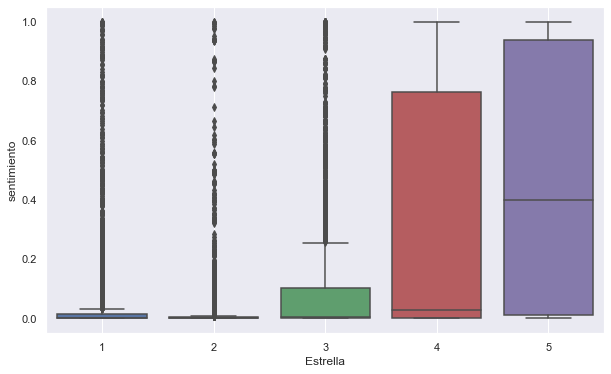

In [35]:
sns.boxplot(data = dfxx, x = 'Estrella', y = "sentimiento")
plt.grid()
plt.show()

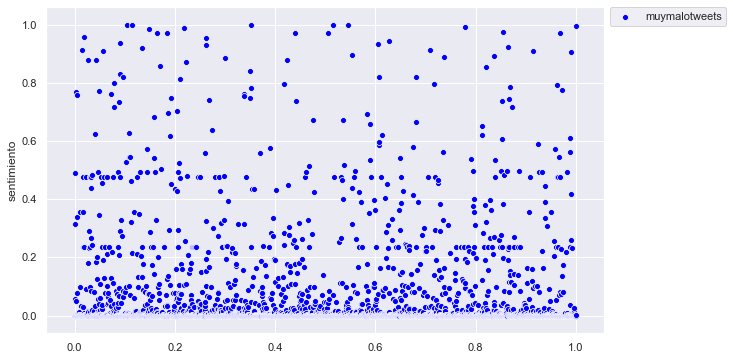

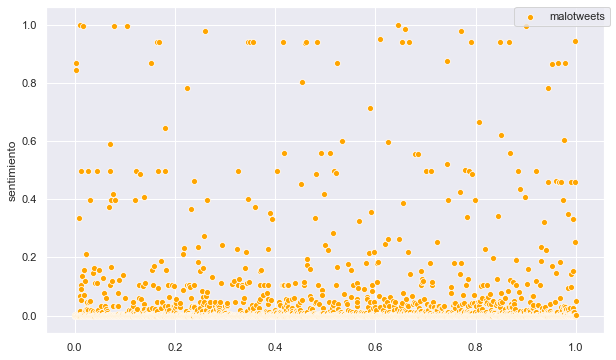

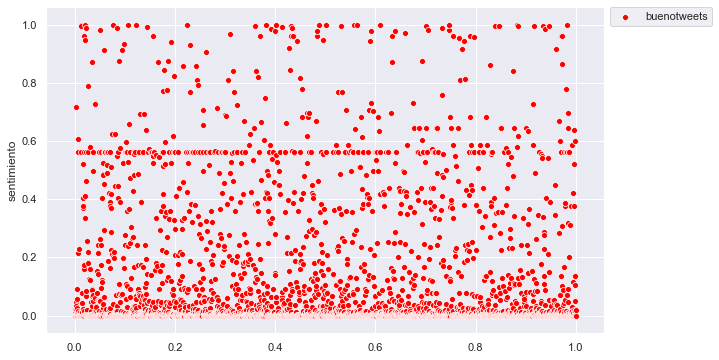

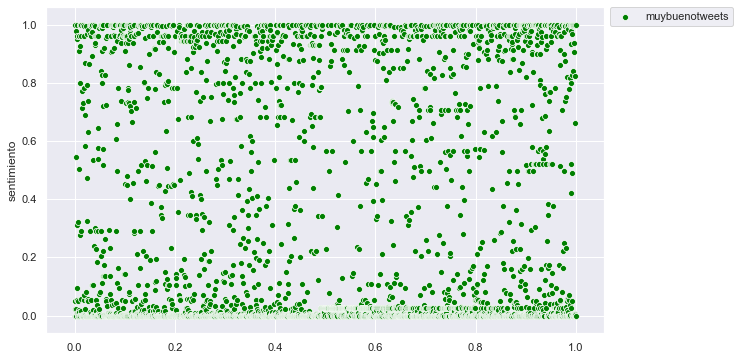

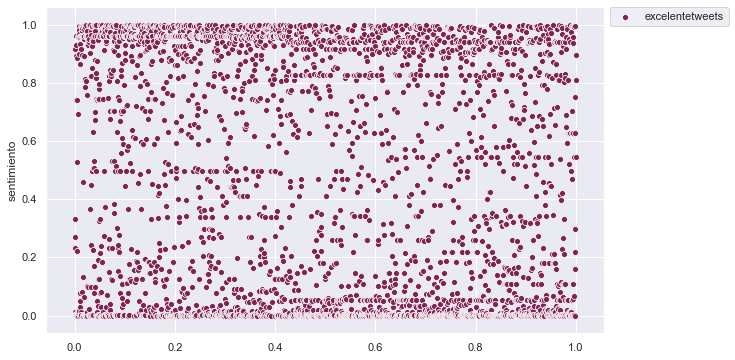

In [36]:
# La variable N indica la cantidad de tweets
N = 3380
# Se normaliza la variable N con el fin de visualizar mejor los datos
valores = np.linspace(0,1,N)
## Gráfico de la estrella 1:
plt.figure(figsize=(10,6))
sns.scatterplot(data=muymalotweets, x=valores , y="sentimiento", color='blue',label = 'muymalotweets') 
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 2:
plt.figure(figsize=(10,6))
sns.scatterplot(data=malotweets, x=valores , y="sentimiento", color='orange',label = 'malotweets')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 3:
plt.figure(figsize=(10,6))
sns.scatterplot(data=buenotweets, x=valores , y="sentimiento", color='red',label = 'buenotweets')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 4:
plt.figure(figsize=(10,6))
sns.scatterplot(data=muybuenotweets, x=valores , y="sentimiento", color='green', label = 'muybuenotweets')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 5:
plt.figure(figsize=(10,6))
sns.scatterplot(data=excelentetweets, x=valores , y="sentimiento", color='#7F2353', label = 'excelentetweets')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

### Luego de ver los gráficos anteriores,  es evidente que algo en el tratamiento de datos está mal.
### No resulta lógico que el análisis de sentimiento, sea el mismo para cada una de las supuestas categorías. Por lo que se va a volver a hacer el tratamiento por separado, es decir, se va a realizar el conteo de retweets por cada categoría y se "simplificarán" los retweets nuevamente, eliminando las menciones y urls.

### Se vuelve a imprimir el gráfico con el fin de verificar que los datos no han sido alterados. O por si se ha definido accidentalmente una variable con el mismo nombre.

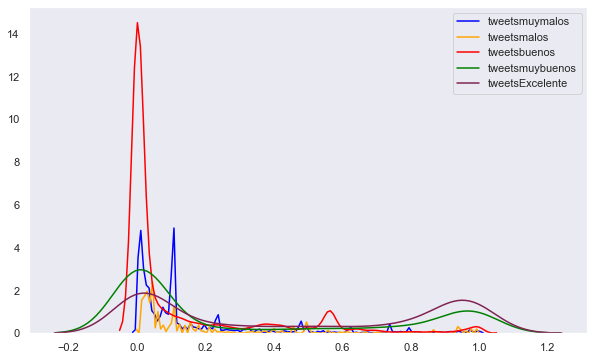

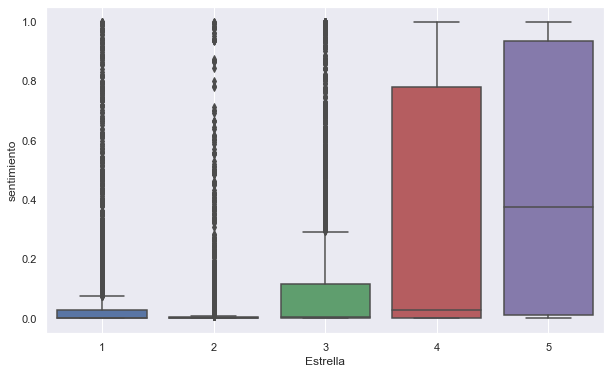

In [37]:
todos_los_tweets=[tweetsmuymalos,tweetsmalos,tweetsbuenos,tweetsmuybuenos,tweetsExcelente]
sns.distplot(tweetsmuymalos[['sentimiento']], hist=False,color='blue', label = 'tweetsmuymalos')
sns.distplot(tweetsmalos[['sentimiento']], hist=False,color='orange', label = 'tweetsmalos')
sns.distplot(tweetsbuenos[['sentimiento']], hist=False,color='red', label = 'tweetsbuenos')
sns.distplot(tweetsmuybuenos[['sentimiento']], hist=False,color='green', label = 'tweetsmuybuenos')
sns.distplot(tweetsExcelente[['sentimiento']], hist=False,color='#7F2353', label = 'tweetsExcelente')

plt.grid()
plt.show()

sns.boxplot(data = tweets, x = 'Estrella', y = "sentimiento")
plt.grid()
plt.show()

### Se crea funcion que elimina las urls y las menciones arrobadas de usuarios en tweets de cada categoría

In [38]:
def derivar_tweet(lista_de_tweets):
    tweets_derivados=[] ## Se crea una lista vacía en donde se almacene cada tweet derivado
    for i in lista_de_tweets: ## Se itera en cada tweet de la lista que le pasamos
        x= re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", i) ## cosas que la funcion elimina
        tweets_derivados.append(x) ## Se añade cada tweet derivado a la lisa
    tweets_derivados = pd.DataFrame(tweets_derivados, columns = ['Texto_derivado']) ## Transforma la lista en un data frame    
    return(tweets_derivados)

In [39]:
df_RT_tweetsmuymalos=derivar_tweet(tweetsmuymalos['Texto'])
df_RT_tweetsmalos=derivar_tweet(tweetsmalos['Texto'])
df_RT_tweetsbuenos=derivar_tweet(tweetsbuenos['Texto'])
df_RT_tweetsmuybuenos=derivar_tweet(tweetsmuybuenos['Texto'])
df_RT_tweetsExcelente=derivar_tweet(tweetsExcelente['Texto'])

### Se añaden a cada categoría la columna de los tweets derivados

In [40]:
tweetsmuymalos['Texto_derivado']=df_RT_tweetsmuymalos
tweetsmalos['Texto_derivado']=df_RT_tweetsmalos
tweetsbuenos['Texto_derivado']=df_RT_tweetsbuenos
tweetsmuybuenos['Texto_derivado']=df_RT_tweetsmuybuenos
tweetsExcelente['Texto_derivado']=df_RT_tweetsExcelente

In [41]:
tweetsExcelente.head(2)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Texto_derivado
0,1409218270729756928,RT @AlfredoMarquezR: Excelente iniciativa serí...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,5,0.268720,RT Excelente iniciativa sería no solo transmi...
1,1409218285481206016,RT @jorgepubliradio: El hincha del @AmericadeC...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,5,0.231412,RT El hincha del que recibió a Duván Vergara...


### Se crea función que identifica si es un retweet y luego se almacena en un dataframe

In [42]:
def cuento_RT(lista_de_tweets):
    contador=0
    RT_contados=[] ## Lista vacía para almacenar 0 si no es RT ó 1 si es RT
    for i in lista_de_tweets: ## Va iterando en cada tweet de la lista
        if "RT" in i: ## se fija si existe la palabra RT al comienxo de cada tweet
            contador+=1 ## Cuenta 1 si se encuentra
            RT_contados.append(1) ## almacena un 1 en la lista, si es positiva la búsqueda
        else:
            contador+=0 ## No cuenta ninguno si ni encuentra nada
            RT_contados.append(0) ## Almacena 0 en la lista si no encuentra nada.
    RT_contados = pd.DataFrame(RT_contados, columns = ['Es_Retweet']) ## Transforma la lista en un data frame
    return(RT_contados) ## Devuelve la lista creada

In [43]:
df_RT_tweetsmuymalos=cuento_RT(tweetsmuymalos['Texto'])
df_RT_tweetsmalos=cuento_RT(tweetsmalos['Texto'])
df_RT_tweetsbuenos=cuento_RT(tweetsbuenos['Texto'])
df_RT_tweetsmuybuenos=cuento_RT(tweetsmuybuenos['Texto'])
df_RT_tweetsExcelente=cuento_RT(tweetsExcelente['Texto'])

### Se asigna a cada categoría su respectiva columna que identifica los Retweets

In [44]:
tweetsmuymalos['Es_Retweet']=df_RT_tweetsmuymalos
tweetsmalos['Es_Retweet']=df_RT_tweetsmalos
tweetsbuenos['Es_Retweet']=df_RT_tweetsbuenos
tweetsmuybuenos['Es_Retweet']=df_RT_tweetsmuybuenos
tweetsExcelente['Es_Retweet']=df_RT_tweetsExcelente

In [45]:
tweetsmuymalos.head()

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Texto_derivado,Es_Retweet
0,1409903338511077120,"Te ves muy buena y yo soy muy malo, paso",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.907869e-01,"Te ves muy buena y yo soy muy malo, paso",0
1,1409903351567891968,@renbabaee @CosmicArepas estás tardando eh? mu...,Twitter Web App,False,1.409903e+18,1.379548e+18,renbabaee,NaN,NaN,NaN,NaN,es,False,1,3.146642e-01,estás tardando eh? muy bueno en la línea de ...,0
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07,La eurocopa de Mbappe fue muy decepcionante...,0
3,1409903584024666112,RT @noemimarcela15: Morenita le pido con todo ...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,2.708075e-02,RT Morenita le pido con todo mi corazón que ...,1
4,1409904001605307904,Pero ese olor es muy rico!!!\nLo malo es q vas...,Twitter for iPhone,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,5.666328e-02,Pero ese olor es muy rico!!!\nLo malo es q vas...,0


### Borramos de cada categoría los RT

In [46]:
tweetsmuymalos = tweetsmuymalos.drop(tweetsmuymalos[(tweetsmuymalos.Es_Retweet == 1)].index)
tweetsmalos = tweetsmalos.drop(tweetsmalos[(tweetsmalos.Es_Retweet == 1)].index)
tweetsbuenos = tweetsbuenos.drop(tweetsbuenos[(tweetsbuenos.Es_Retweet == 1)].index)
tweetsmuybuenos = tweetsmuybuenos.drop(tweetsmuybuenos[(tweetsmuybuenos.Es_Retweet == 1)].index)
tweetsExcelente = tweetsExcelente.drop(tweetsExcelente[(tweetsExcelente.Es_Retweet == 1)].index)

### Se asigna la nueva columna del puntaje del tweet derivado

In [47]:
tweetsmuymalos["sentimiento_nuevo"] = tweetsmuymalos["Texto_derivado"].apply(lambda x:sentimientos.sentiment(x))
tweetsmalos["sentimiento_nuevo"] = tweetsmalos["Texto_derivado"].apply(lambda x:sentimientos.sentiment(x))
tweetsbuenos["sentimiento_nuevo"] = tweetsbuenos["Texto_derivado"].apply(lambda x:sentimientos.sentiment(x))
tweetsmuybuenos["sentimiento_nuevo"] = tweetsmuybuenos["Texto_derivado"].apply(lambda x:sentimientos.sentiment(x))
tweetsExcelente["sentimiento_nuevo"] = tweetsExcelente["Texto_derivado"].apply(lambda x:sentimientos.sentiment(x))

### En el siguiente gráfico de distribución se compara el puntaje obtenido de los tweets que contenían a las urls y las menciones con el nuevo puntaje asignado de los tweets derivados.
### Se puede observar en el gráfico que no hay ningún cambio significativo a simple vista

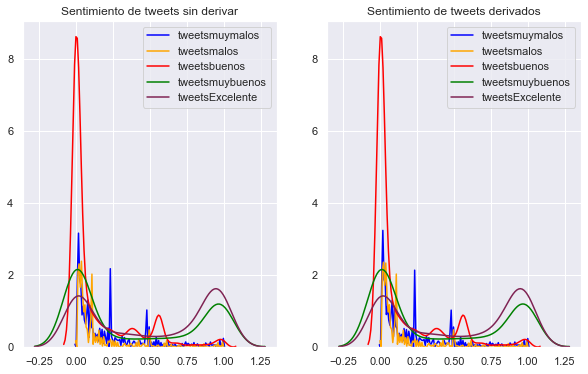

In [48]:
subplot(1,2,1)

ax=(sns.distplot(tweetsmuymalos[['sentimiento']], hist=False,color='blue', label = 'tweetsmuymalos'),
sns.distplot(tweetsmalos[['sentimiento']], hist=False,color='orange', label = 'tweetsmalos'),
sns.distplot(tweetsbuenos[['sentimiento']], hist=False,color='red', label = 'tweetsbuenos'),
sns.distplot(tweetsmuybuenos[['sentimiento']], hist=False,color='green', label = 'tweetsmuybuenos'),
sns.distplot(tweetsExcelente[['sentimiento']], hist=False,color='#7F2353', label = 'tweetsExcelente'))
plt.title("Sentimiento de tweets sin derivar")
subplot(1,2,2)

ax=(sns.distplot(tweetsmuymalos[['sentimiento_nuevo']], hist=False,color='blue', label = 'tweetsmuymalos'),
sns.distplot(tweetsmalos[['sentimiento_nuevo']], hist=False,color='orange', label = 'tweetsmalos'),
sns.distplot(tweetsbuenos[['sentimiento_nuevo']], hist=False,color='red', label = 'tweetsbuenos'),
sns.distplot(tweetsmuybuenos[['sentimiento_nuevo']], hist=False,color='green', label = 'tweetsmuybuenos'),
sns.distplot(tweetsExcelente[['sentimiento_nuevo']], hist=False,color='#7F2353', label = 'tweetsExcelente'))
plt.title("Sentimiento de tweets derivados")

plt.show()

#sns.set(rc={"figure.figsize": (10, 6)})


### Se realiza nuevamente los diagramas de dispersión de los tweets, para ver como ha variado su distribución con respecto al puntaje

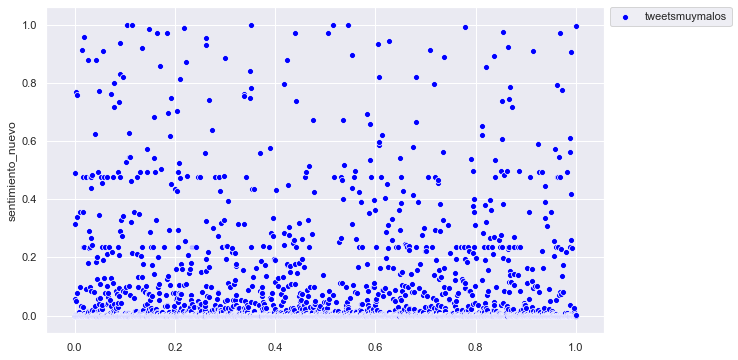

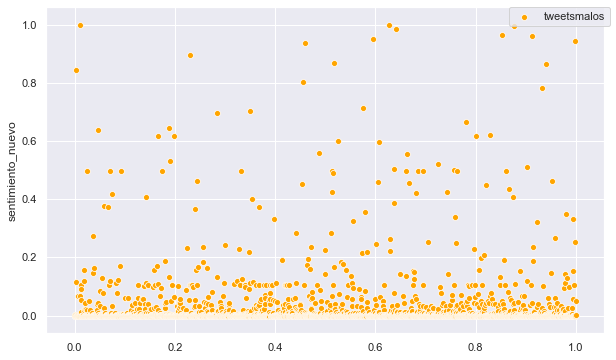

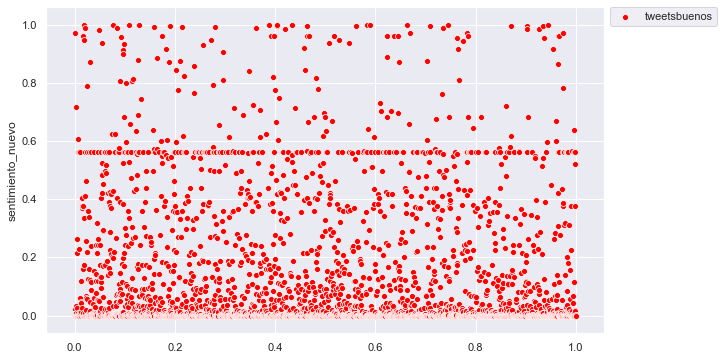

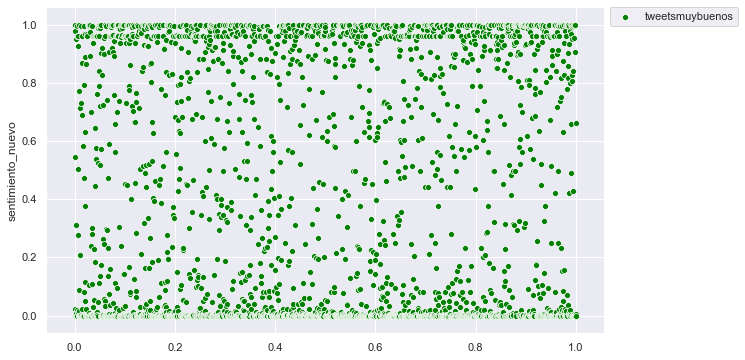

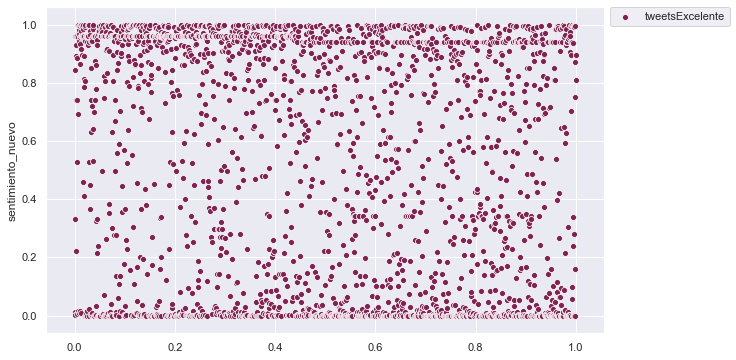

In [49]:
# Se normaliza la variable N con el fin de visualizar mejor los datos  np.linspace(0,1,Número de datos)

## Gráfico de la estrella 1:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmuymalos, x=np.linspace(0,1,3380) , y="sentimiento_nuevo", color='blue',label = 'tweetsmuymalos') 
plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 2:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmalos, x=np.linspace(0,1,2679) , y="sentimiento_nuevo", color='orange',label = 'tweetsmalos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 3:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsbuenos, x=np.linspace(0,1,3145) , y="sentimiento_nuevo", color='red',label = 'tweetsbuenos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 4:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsmuybuenos, x=np.linspace(0,1,2758) , y="sentimiento_nuevo", color='green', label = 'tweetsmuybuenos')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
## Gráfico de la estrella 5:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tweetsExcelente, x=np.linspace(0,1,2383) , y="sentimiento_nuevo", color='#7F2353', label = 'tweetsExcelente')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

## Triming Datasets
    Lo que se realiza en la siguiente celda es, cortar los datasets con el fin de darles un puntaje más certero.
    
    Lo cierto es que se pierden muchisimos datos, pero por otro lado, lo que se busca es que el modelo de clasificación, pueda interpretar bien los inputs.
    
    Porque si al modelo se le ingresa basura, saldrá basura. Garbage in, garbage out.

In [80]:
tweetsmuymalos_1=tweetsmuymalos[tweetsmuymalos['sentimiento_nuevo']<=0.2].copy()
tweetsmalos_2=tweetsmalos[tweetsmalos['sentimiento_nuevo']<=0.4].copy()
tweetsmalos_2=tweetsmalos_2[tweetsmalos_2['sentimiento_nuevo']>0.2].copy()
tweetsbuenos_3=tweetsbuenos[tweetsbuenos['sentimiento_nuevo']<=0.6].copy()
tweetsbuenos_3=tweetsbuenos_3[tweetsbuenos_3['sentimiento_nuevo']>0.4].copy()
tweetsmuybuenos_4=tweetsmuybuenos[tweetsmuybuenos['sentimiento_nuevo']>0.6].copy()
tweetsmuybuenos_4=tweetsmuybuenos_4[tweetsmuybuenos_4['sentimiento_nuevo']<=0.8].copy()
tweetsExcelente_5=tweetsExcelente[tweetsExcelente['sentimiento_nuevo']<=1].copy()
tweetsExcelente_5=tweetsExcelente_5[tweetsExcelente_5['sentimiento_nuevo']>0.8]

len(tweetsmuymalos_1)

3028

## Una vez finalizado el análisis exploratorio y limpieza de datos, se procede a unir los dataframes:

In [106]:
frames=[tweetsmuymalos_1,tweetsmalos_2,tweetsbuenos_3,tweetsmuybuenos_4,tweetsExcelente_5]
general_tweets=pd.concat(frames)
general_tweets
#print(3028+35+315+151+1003)

,Id,Texto,Fuente,Truncado,Respuesta_al_tweet,Respuesta_al_usuario_id,Respuesta_al_usuario_nombre,Localización,Coordenadas,Ciudad,Contribuciones,Idioma,Retweeted,Estrella,sentimiento,Texto_derivado,Es_Retweet,sentimiento_nuevo
2,1409903472686817024,@CarlosMParejo @Fulcrum05 @PuyiFCB La eurocopa...,Twitter Web App,True,1.409896e+18,3.039958e+09,CarlosMParejo,NaN,NaN,NaN,NaN,es,False,1,1.004252e-07,La eurocopa de Mbappe fue muy decepcionante...,0,1.004252e-07
4,1409904001605307904,Pero ese olor es muy rico!!!\nLo malo es q vas...,Twitter for iPhone,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,5.666328e-02,Pero ese olor es muy rico!!!\nLo malo es q vas...,0,5.666328e-02
5,1409904016935502080,@diegomunoz75 Todo muy lindo con tus estadisti...,Twitter for iPhone,False,1.409897e+18,1.545546e+08,diegomunoz75,NaN,NaN,NaN,NaN,es,False,1,7.672089e-04,Todo muy lindo con tus estadisticas pero me v...,0,7.672089e-04
6,1409904043879768064,@LisQue2 @Alvisepf @LeticiaDolera Me hace grac...,Twitter for Android,True,1.409764e+18,1.266667e+09,LisQue2,NaN,NaN,NaN,NaN,es,False,1,1.651226e-10,Me hace gracia lo de los derechos de la inf...,0,1.651226e-10
8,1409904180081446912,"El servicio de @LaCuracao_GT es pésimo, muy ma...",Twitter Web App,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,1,4.187704e-06,"El servicio de es pésimo, muy malo, pero hay ...",0,4.187704e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,1409340944386871040,Atlanta encontró a su defensor perfecto para G...,Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,5,9.940744e-01,Atlanta encontró a su defensor perfecto para G...,0,9.940744e-01
4992,1409341004260557056,"@just21fernanda 314, número perfecto @just21fe...",Twitter for iPhone,False,1.409271e+18,1.398362e+18,just21fernanda,NaN,NaN,NaN,NaN,es,False,5,8.712766e-01,"314, número perfecto",0,8.712766e-01
4994,1409341038146342912,"mañana 1° ,clima perfecto para entrenar",Twitter for Android,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,es,False,5,9.953147e-01,"mañana 1° ,clima perfecto para entrenar",0,9.953147e-01
4998,1409341042713927936,@breathinxzayn noo esta perfecto,Twitter for Android,False,1.409340e+18,1.273768e+18,breathinxzayn,NaN,NaN,NaN,NaN,es,False,5,8.967480e-01,noo esta perfecto,0,8.967480e-01


In [107]:
#del general_tweets['Texto']
general_tweets.drop(['Texto','Id','Fuente','Truncado','Respuesta_al_tweet','Respuesta_al_usuario_id','Respuesta_al_usuario_nombre','Localización','Coordenadas','Ciudad','Contribuciones','Idioma','Retweeted','sentimiento','Es_Retweet'],axis=1, inplace=True)                                                                  
#df = df.drop('column_name', 1)

In [108]:
general_tweets

,Estrella,Texto_derivado,sentimiento_nuevo
2,1,La eurocopa de Mbappe fue muy decepcionante...,1.004252e-07
4,1,Pero ese olor es muy rico!!!\nLo malo es q vas...,5.666328e-02
5,1,Todo muy lindo con tus estadisticas pero me v...,7.672089e-04
6,1,Me hace gracia lo de los derechos de la inf...,1.651226e-10
8,1,"El servicio de es pésimo, muy malo, pero hay ...",4.187704e-06
...,...,...,...
4986,5,Atlanta encontró a su defensor perfecto para G...,9.940744e-01
4992,5,"314, número perfecto",8.712766e-01
4994,5,"mañana 1° ,clima perfecto para entrenar",9.953147e-01
4998,5,noo esta perfecto,8.967480e-01


## Importamos librerías

In [50]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

## Se carga el dataset de AMAZON
` El data set que usamos en el trabajo anterior`

In [112]:
pc30NLP=pd.read_excel(r'C:\Users\Alfredo\Bitácoras\Twitter\pc30NLP.xlsx')

In [114]:
pc30NLP.head(3)

,Unnamed: 0,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,Cat_product_category
0,0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless,29
1,1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel,0
2,2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports,25


### Se eliminan las columnas que no se van a usar

In [115]:
pc30NLP.drop(['Unnamed: 0','review_id','product_id','reviewer_id','language','review_title','product_category','Cat_product_category'],axis=1, inplace=True)                                                                  

### Se crea una columna nueva en el dataset de amazon, con la librería prometida. Con el fin de tener una comparación con los tweets trabajados.

In [117]:
pc30NLP["sentimiento_nuevo"] = pc30NLP["review_body"].apply(lambda x:sentimientos.sentiment(x))

### Se cambian los nombres de las columnas, para que cuando se concatenen los dataframes, no haya problema.

In [126]:
pc30NLP.columns = ['Estrella', 'Texto_derivado','sentimiento_nuevo']

In [127]:
pc30NLP

,Estrella,Texto_derivado,sentimiento_nuevo
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",3.796551e-01
1,1,No he recibido el pedido no la devolución,3.650316e-04
2,1,"Tengo que buscar otro sistema, este no funcion...",1.143358e-03
3,1,Utilicé las brocas de menor diámetro y se me d...,5.863544e-13
4,1,No me gusta su olor a viejo y aspecto malo,3.820861e-05
...,...,...,...
62995,5,Todo funcional y la calidad del sonido era muy...,9.897334e-01
62996,5,Buena compra.Se adaptó perfectamente al lavava...,1.613186e-03
62997,5,"Muy ultil, buen material y cómodos",9.836814e-01
62998,5,Va muy bien. Humifica bien el ambiente. Lo úni...,9.871113e-04


### Se concatenan los dos dataframes, ya listos.

In [124]:
frames=[pc30NLP,general_tweets]
todo=pd.concat(frames)

In [125]:
todo

,Estrella,Texto_derivado,sentimiento_nuevo
0,1,"Malisimo, muy grande demasiado aparatoso y mal...",3.796551e-01
1,1,No he recibido el pedido no la devolución,3.650316e-04
2,1,"Tengo que buscar otro sistema, este no funcion...",1.143358e-03
3,1,Utilicé las brocas de menor diámetro y se me d...,5.863544e-13
4,1,No me gusta su olor a viejo y aspecto malo,3.820861e-05
...,...,...,...
4986,5,Atlanta encontró a su defensor perfecto para G...,9.940744e-01
4992,5,"314, número perfecto",8.712766e-01
4994,5,"mañana 1° ,clima perfecto para entrenar",9.953147e-01
4998,5,noo esta perfecto,8.967480e-01


### Vectorización
+ Se vectoriza con la función one_hot() de Keras y se limita el vocabulario a 1000 palabras

In [ ]:
# vectorizamos
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

### Ahora vemos la similaridad semántica
`Sirve para escribir cosas de diferente manera, obviamente para expresar lo mismo`

In [33]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
## Se compara la similaridad de la palabra 1 con la palabra 2
print("El porcentaje de similaridad es: ",w1.wup_similarity(w2))
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('car.n.01')
## Se compara la similaridad de la palabra 1 con la palabra 2
print("El porcentaje de similaridad es: ",w1.wup_similarity(w2))
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('sheet.n.01')
print("El porcentaje de similaridad es: ",w1.wup_similarity(w2))
## Se compara la similaridad de la palabra 1 con la palabra 2
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('shit.n.01')
## Se compara la similaridad de la palabra 1 con la palabra 2
print("El porcentaje de similaridad es: ",w1.wup_similarity(w2))

El porcentaje de similaridad es:  0.9090909090909091
El porcentaje de similaridad es:  0.6956521739130435
El porcentaje de similaridad es:  0.3333333333333333
El porcentaje de similaridad es:  0.2
